# Introduction:-

## Relevant Information:
- The data is related with direct marketing campaigns of a Portuguese banking institution.
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,in order to access if the product (bank term deposit) would be (or not) subscribed. 


### Additional Information:-
- There are two datasets:
    - 1) bank-full.csv with all examples, i.e more than 45000(total=45211)
    - 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
- Number Columns:- 17

 ### Input variables:
   #### Bank client data:
   - age (numeric)
   - job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",    "blue-collar","self-employed","retired","technician","services") 
   - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - education (categorical: "unknown","secondary","primary","tertiary")
   - default: has credit in default? (binary: "yes","no")
   - balance: average yearly balance, in euros (numeric) 
   - housing: has housing loan? (binary: "yes","no")
   - loan: has personal loan? (binary: "yes","no")
    
    
   #### Related with the last contact of the current campaign:
   - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   - day: last contact day of the month (numeric)
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - duration: last contact duration, in seconds (numeric)
    
    
   #### Other attributes:
  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
  - y : has the client subscribed a term deposit? (binary: "yes","no")


#### What is a term deposit?
#### Term Deposit:-
 - A term deposit, also known as a fixed deposit, is an investment instrument in which a lump sum is deposited at an agreed rate of interest for a fixed period ranging from 1 month to 5 years.
- One can avail fixed deposits with financial institutions like banks, non-banking financial companies (NBFC),credit unions, post offices and building societies.

##### Characteristics of Term Deposits:-
- Fixed rate of interest:- Interest rates for fixed deposits are fixed and are not subject to market fluctuations.
- Safety of investment:-  Since fixed deposit interest rates are not affected by changes in the economy, it is one of the safest investment options available.

In [90]:
# import all required liabrary
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
# load first data set 
df1 = pd.read_csv('E:/JupyterDemo/Datasets/CapstoneProject/bankfull.csv',sep=';')
df1.shape

(45211, 17)

In [92]:
# load second second data set 
df2 = pd.read_csv('E:/JupyterDemo/Datasets/CapstoneProject/bank.csv',sep=';')

In [93]:

## Combine two datasets into one
frames = [df1, df2]
df = pd.concat(frames)

In [94]:
# Check number of observation and features
df.shape

(49732, 17)

In [95]:
# To check or read first five rows in transpose
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [96]:
# To readd last five row in transpose
df.tail().T

,4516,4517,4518,4519,4520
age,33,57,57,28,44
job,services,self-employed,technician,blue-collar,entrepreneur
marital,married,married,married,married,single
education,secondary,tertiary,secondary,secondary,tertiary
default,no,yes,no,no,no
balance,-333,-3313,295,1137,1136
housing,yes,yes,no,no,yes
loan,no,yes,no,no,yes
contact,cellular,unknown,cellular,cellular,cellular
day,30,9,19,6,3


In [97]:
# To get columns name of given bank data set
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [98]:
# To get structure of given dataset i.e data types with not null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [99]:
# data types of each columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [100]:
# to get stastical information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [101]:
for col in df.select_dtypes(include='object').columns:
    print(col,':-')
    print(df[col].unique())

job :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :-
['married' 'single' 'divorced']
education :-
['tertiary' 'secondary' 'unknown' 'primary']
default :-
['no' 'yes']
housing :-
['yes' 'no']
loan :-
['no' 'yes']
contact :-
['unknown' 'cellular' 'telephone']
month :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome :-
['unknown' 'failure' 'other' 'success']
y :-
['no' 'yes']


In [102]:
# to check duplicate values
df.duplicated().sum()

4521

### Note:-
- There are 4521 duplicate value,so we want to delete that duplicate value

In [103]:
# drop duplicate value
df = df.drop_duplicates()

In [104]:
df.shape

(45211, 17)

#### Note:-
- In this data set the outcome variable is named 'y', so we rename it with 'deposit'.

In [105]:
# rename outcome variable with 'deposit'
df = df.rename(columns={'y':'deposit'})

In [166]:
df.to_csv('sqlproject.csv')

### Exploratory Data Analysis

#### Find Unwanted or Unused Columns

##### Note:- 
- In the given dataset,there is no any unwanted or unused column.
- Most all columns are used for bulid a model.

#### Find Missing Value

In [106]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### Note:-
- There is no any null value in this dataset

#### Find the features with one value

In [107]:
for feature in df.columns:
    print(feature,df[feature].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


##### Note:-
- There is no any feature that have one or single value.

#### To Explore Categorical Features.

In [108]:
cat_features = [features for features in df.columns if ((df[features].dtypes=='object') & (features not in ['deposit']))]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [109]:
# to get number of unique value in each categorical features

for col in cat_features:
    print('The feature is {} and number of categories are {} '.format(col,len(df[col].unique())))

The feature is job and number of categories are 12 
The feature is marital and number of categories are 3 
The feature is education and number of categories are 4 
The feature is default and number of categories are 2 
The feature is housing and number of categories are 2 
The feature is loan and number of categories are 2 
The feature is contact and number of categories are 3 
The feature is month and number of categories are 12 
The feature is poutcome and number of categories are 4 


#### Note:-
- There are 9 categorical features out of 17 features.
- Job and Month has higest number of category values.

#### To find the categorical Features Distribution.

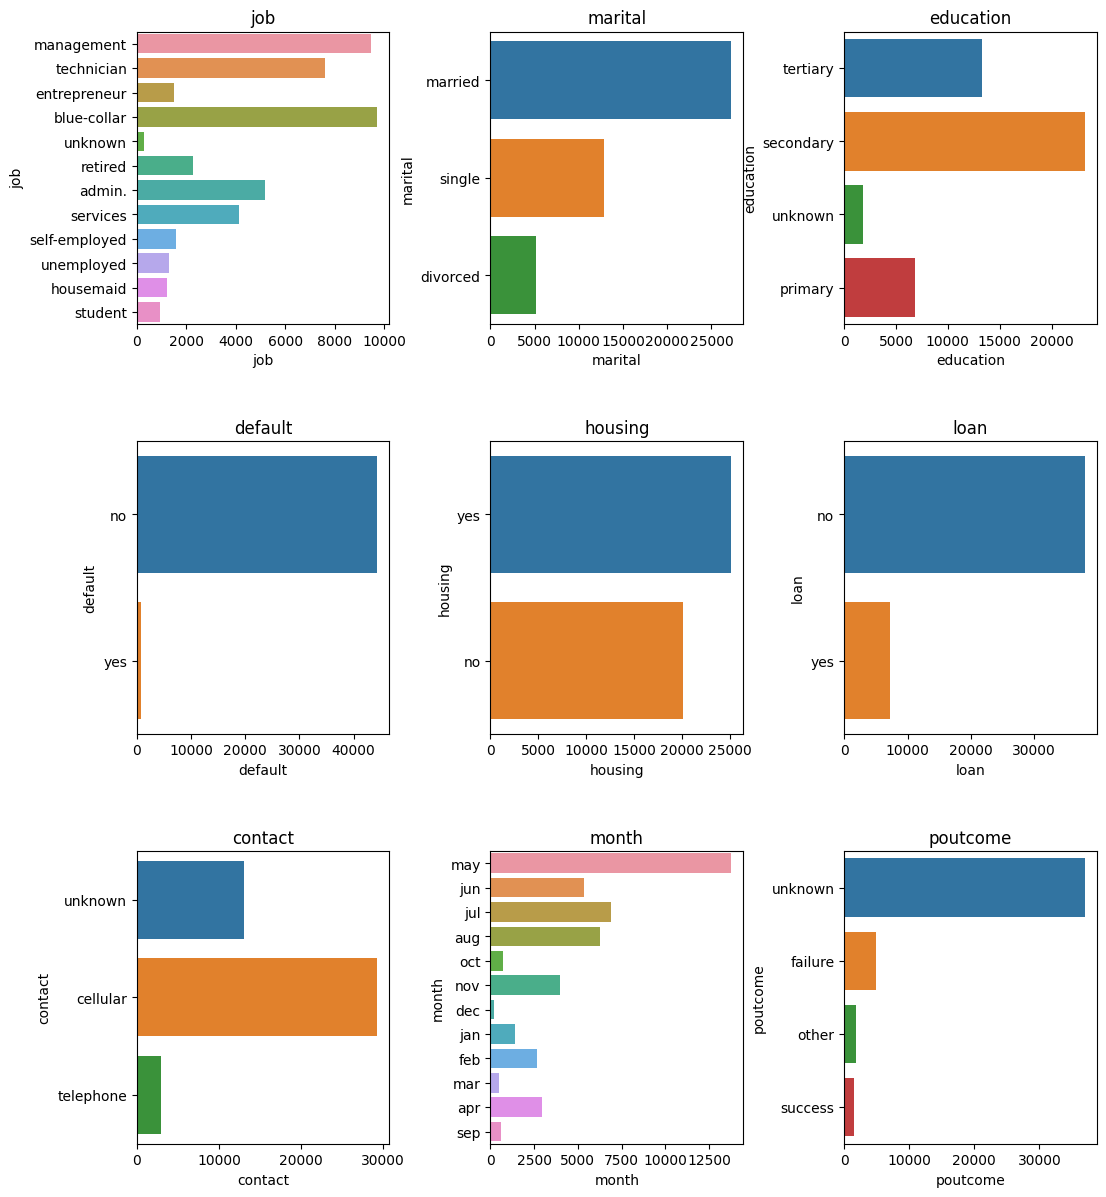

In [110]:
# Count plot based on each categorical features(Univariate Analysis)

plt.figure(figsize=(12,60)) # setting figure of plot
plotnumber = 1
for cat_feature in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_feature,data=df)
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    plotnumber+=1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

##### Note:-
- In a Job categorical feature,we observe that blue-collar and managment types of jobs are higher than other
  and there are less number in student category.
- In marital category most of clients are married and less pepole are divorced.
- In education category most of the people or clients are completed secondary class education.
- Most of the customers have taken home loans and less number  in personal loans.
- Most of customers are used  celluar phone.
- Bank marketing campaigns in month May have more data.

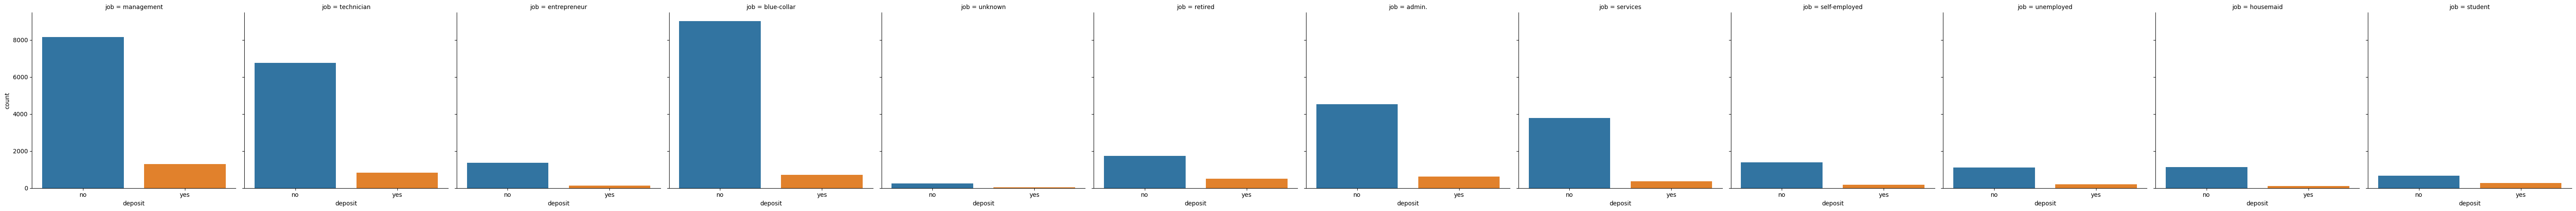

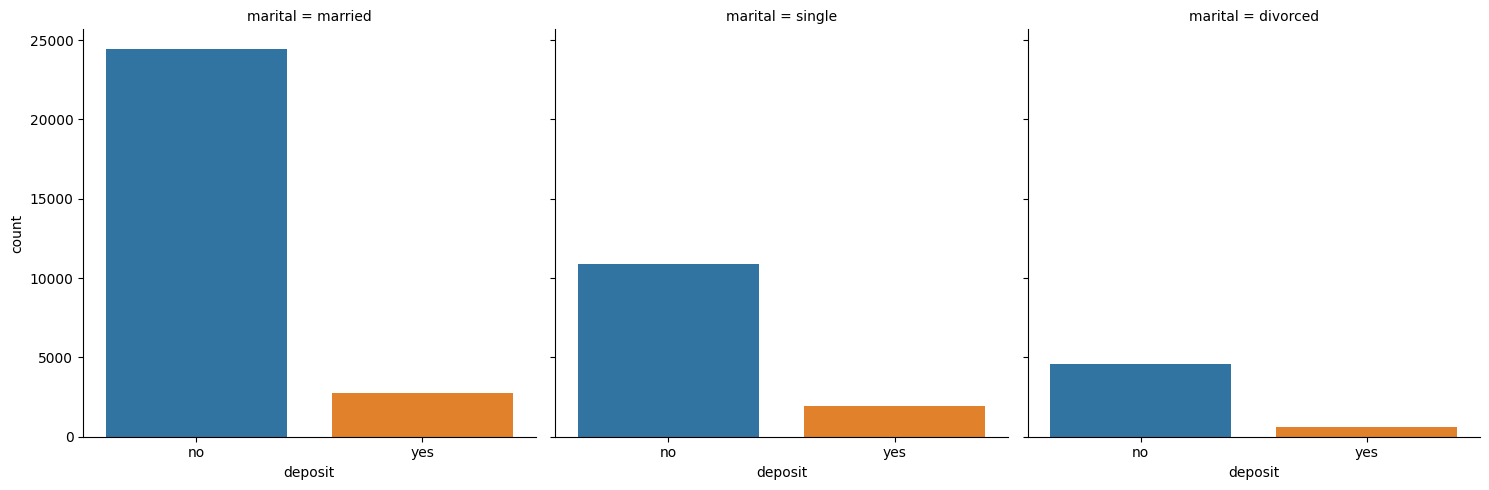

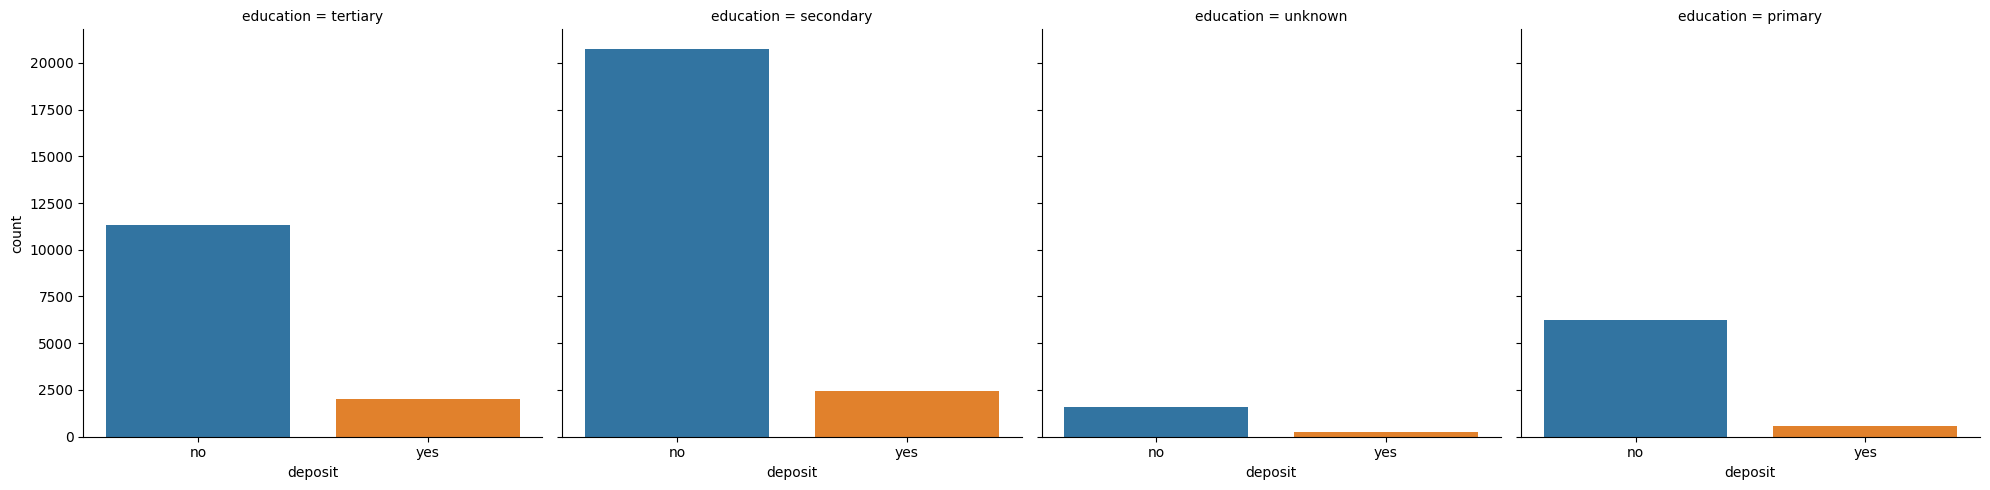

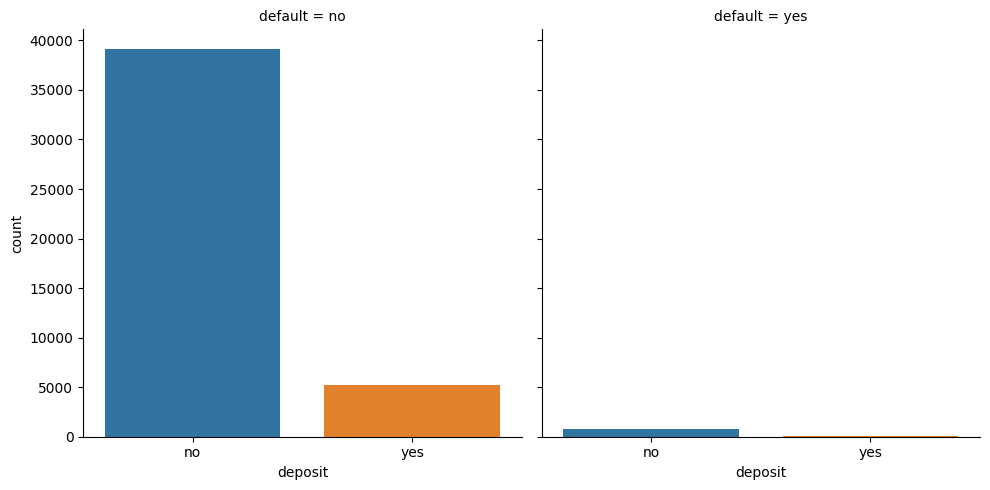

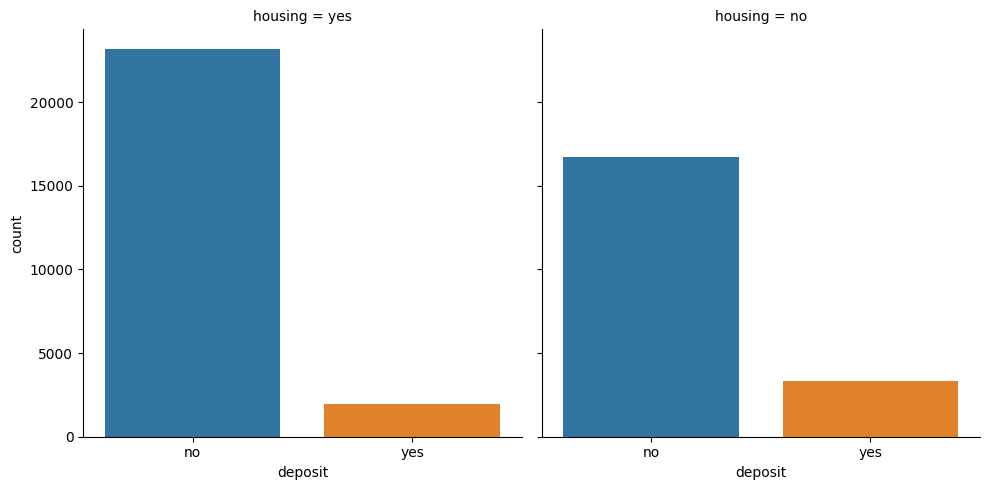

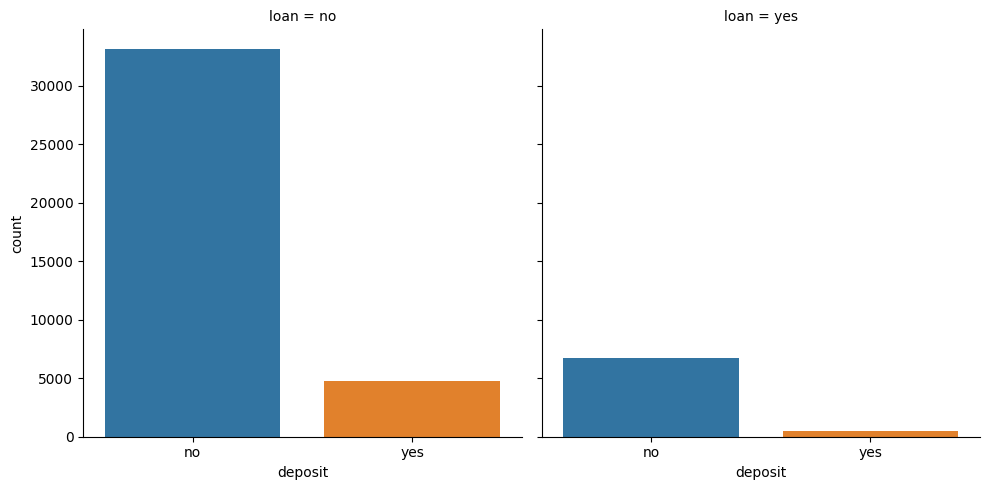

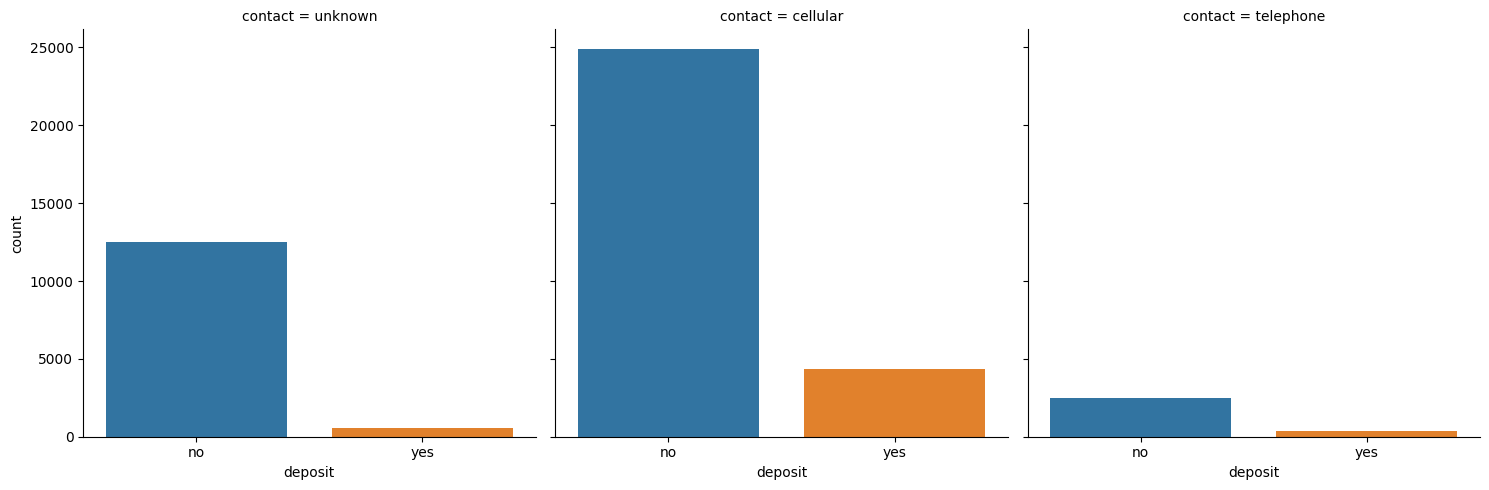

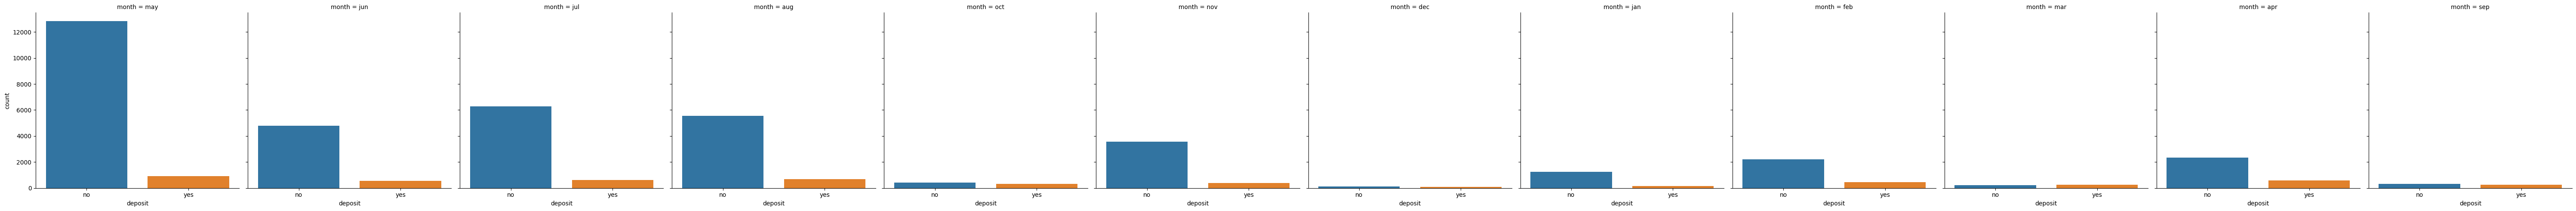

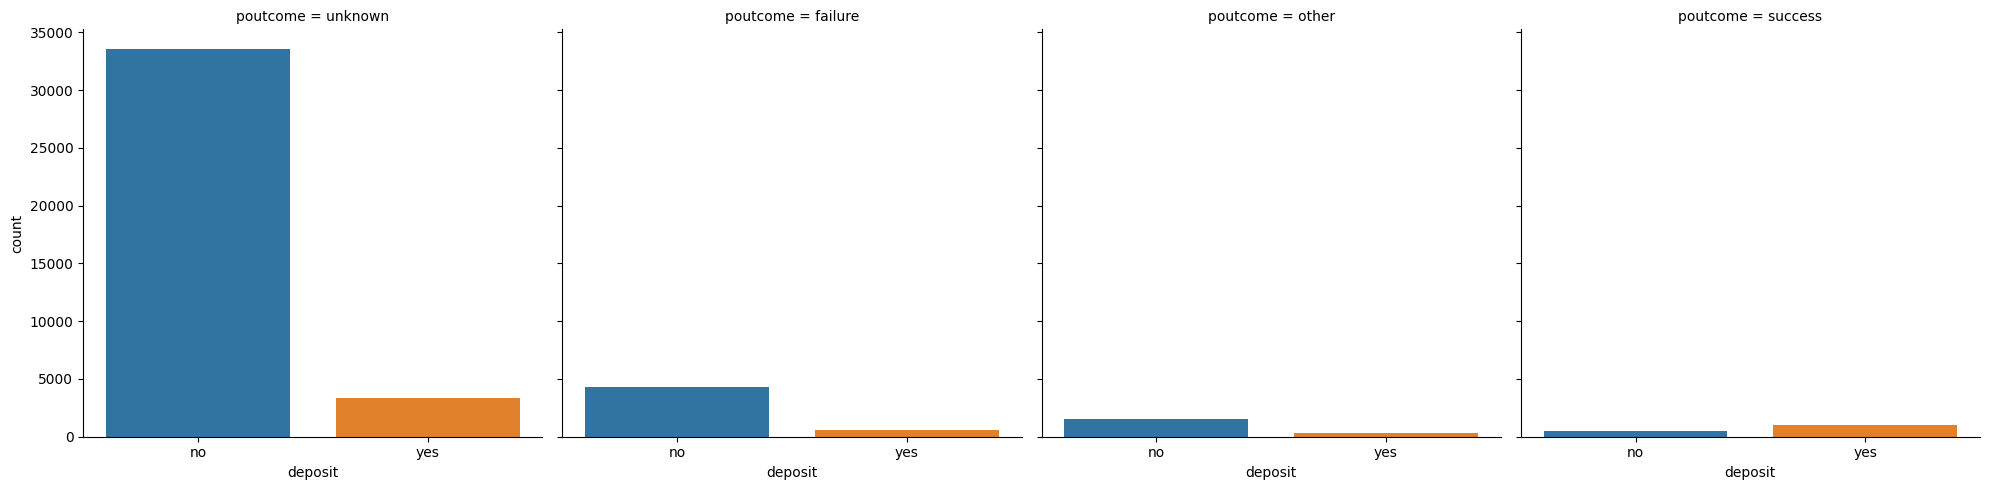

In [111]:
### Relationship between categorical features and Outcome 
### check replation ship between independent variables and dependent variable.
### Using catplot()

for cat_col in cat_features:
    sns.catplot(data=df,x='deposit',col=cat_col,kind='count')
plt.show()

In [112]:
## check depedent variable split or group by each category and find count
for cat_col in cat_features:
    print(df.groupby(['deposit',cat_col]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

#### Note:-
- Among the job categories, management job clients are most interested in deposits.
- Married people are very interested in deposits.
- Customers who have completed his/her education in secondary level are more interested in deposits.
- Consumers with home loans seem not to be interested in deposits.
- In month of May, June, July and August have higher interest on deposits.
- If the results of the campaign are successful, it means that customers are interested in deposits.

In [113]:
### Explore Numerical Columns or features

numerical_features = [feature for feature in df.columns if ((df[feature].dtypes!= 'object') & (feature not in ['deposit']))]
print('Numer of Numerical Features are:-',len(numerical_features))

# To show data of numerical features
df[numerical_features].head()

Numer of Numerical Features are:- 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#### Note:-
- There are 7 Numerical Features in bank marketing data set.

### Distribution of Numerical Features

C:\Users\Sairam\AppData\Local\Temp\ipykernel_15160\1320118435.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
C:\Users\Sairam\AppData\Local\Temp\ipykernel_15160\1320118435.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
C:\Users\Sairam\AppDat

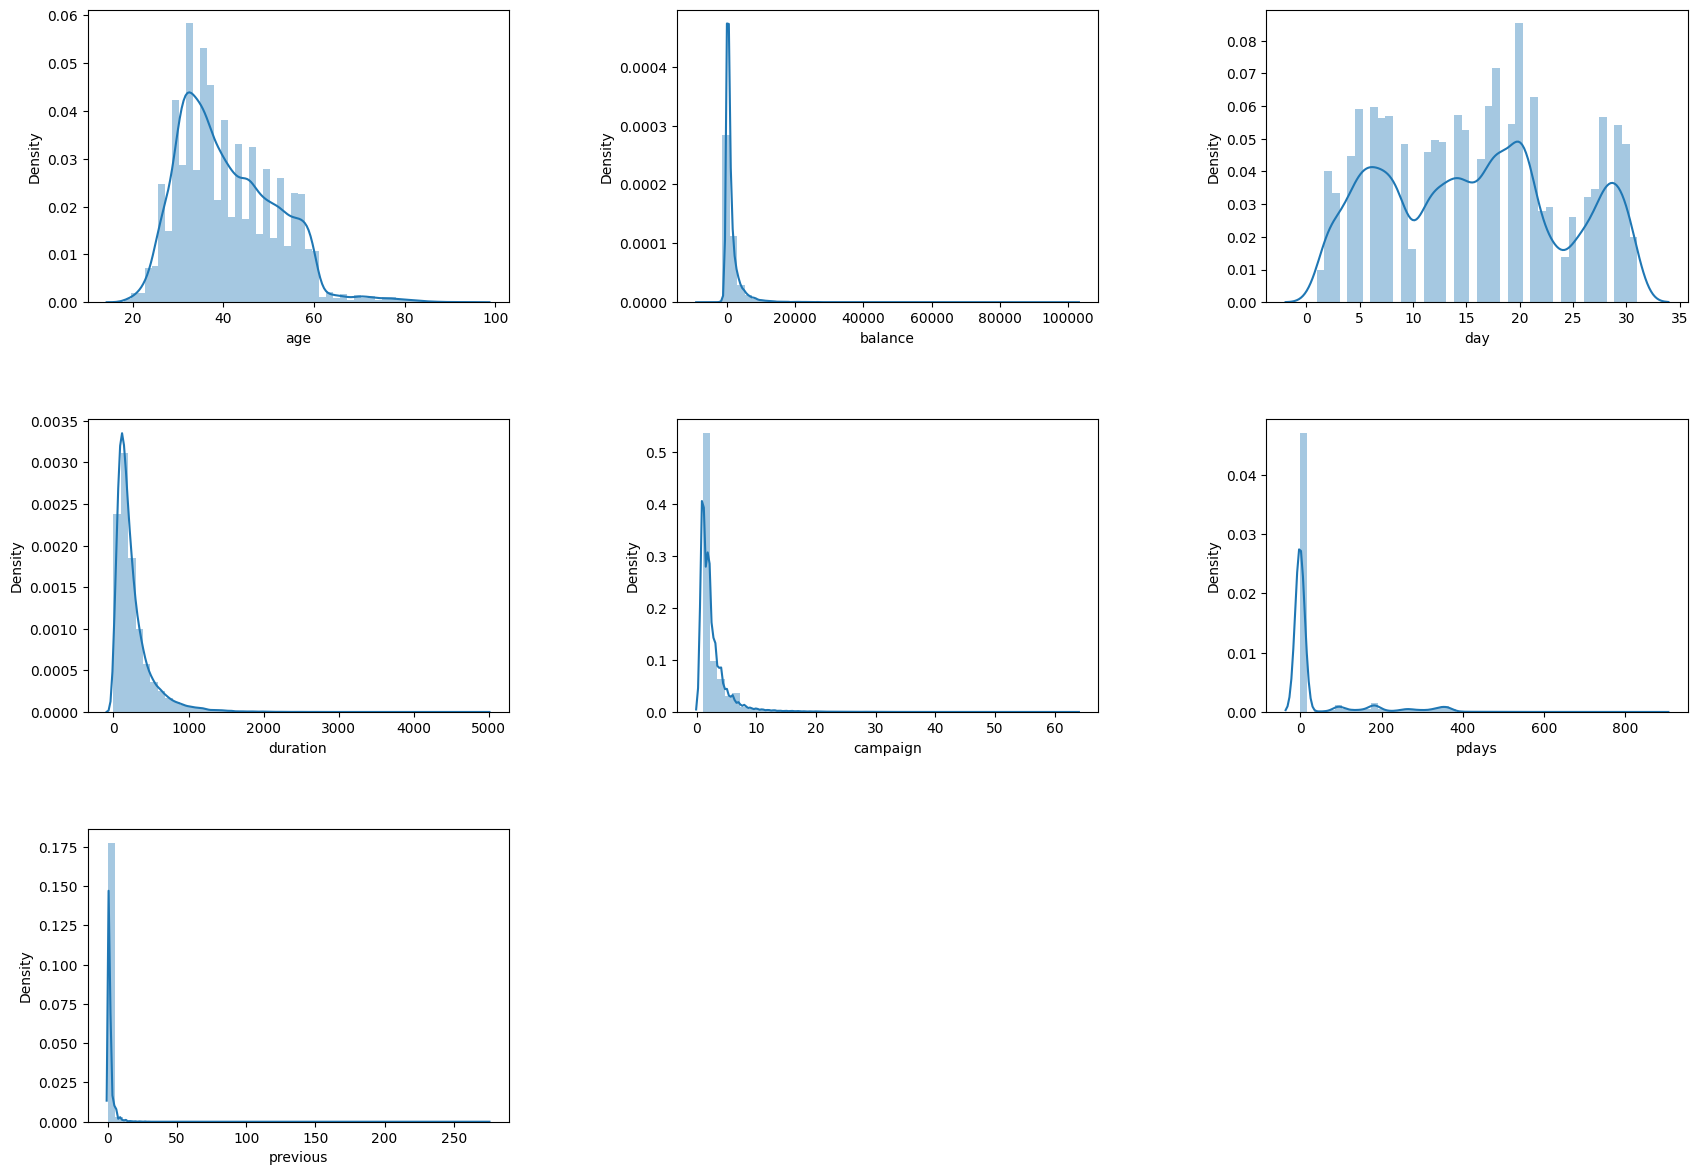

In [114]:
# Plot Univariate Analysis distribution for Numerical Variables
plt.figure(figsize=(20,60)) # setting figure size
pltnum = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,pltnum)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    pltnum+=1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

#### Note:-
- We observe thus distplot that Age and day numerical features are normally distributed.
- Balance,duration,campaign,pdays and previous features are skewed towards right and there are some outliers.

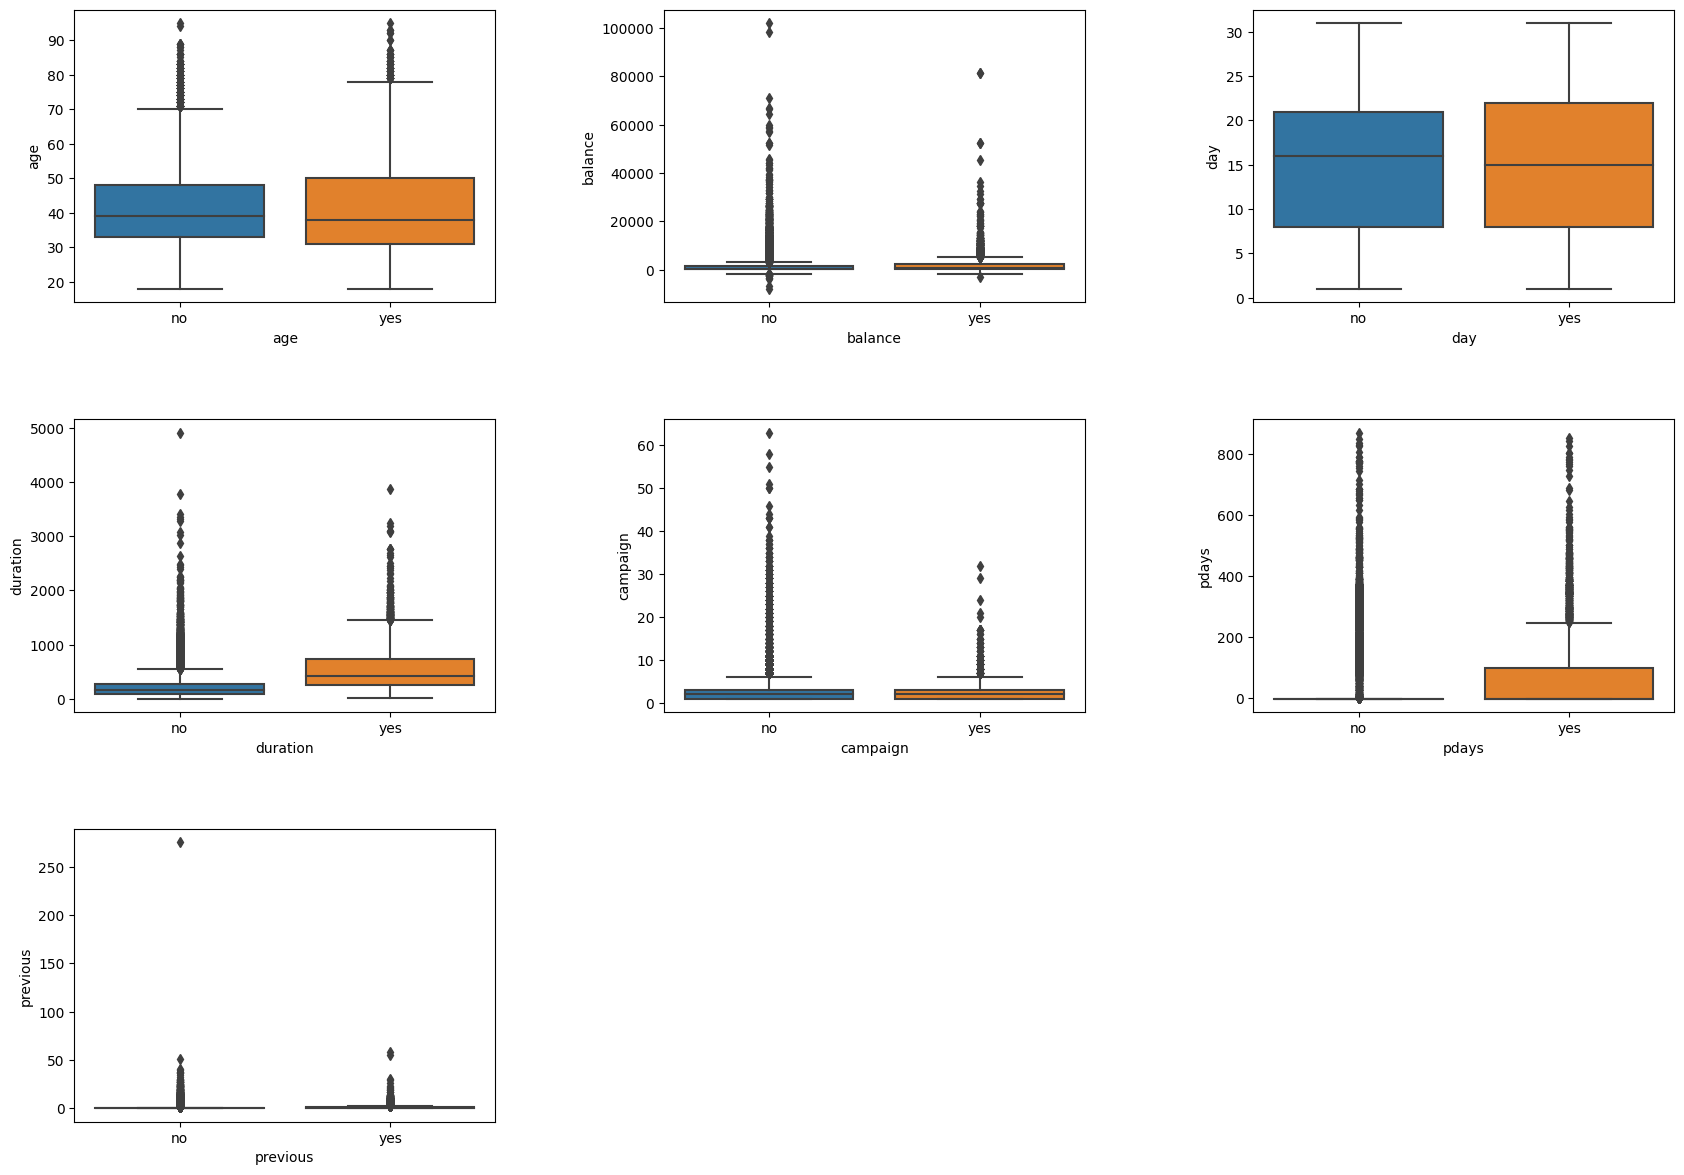

In [115]:
### Relationship between Numerical feature and categorical feature using boxplot()
### here we just check relation between numerical independent features with dependent features i.e deposit
### Bivariate Distribution
plt.figure(figsize=(20,60))
pltnum=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,pltnum)
    sns.boxplot(x='deposit',y=df[numerical_feature],data=df)
    plt.xlabel(numerical_feature)
    pltnum+=1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

#### Note:-
- 30 to 50 age group who are interested for deposit.
- for longer duration call indicate that the client seems to be interested in term deposit.

#### Numerical to Numerical Distribution

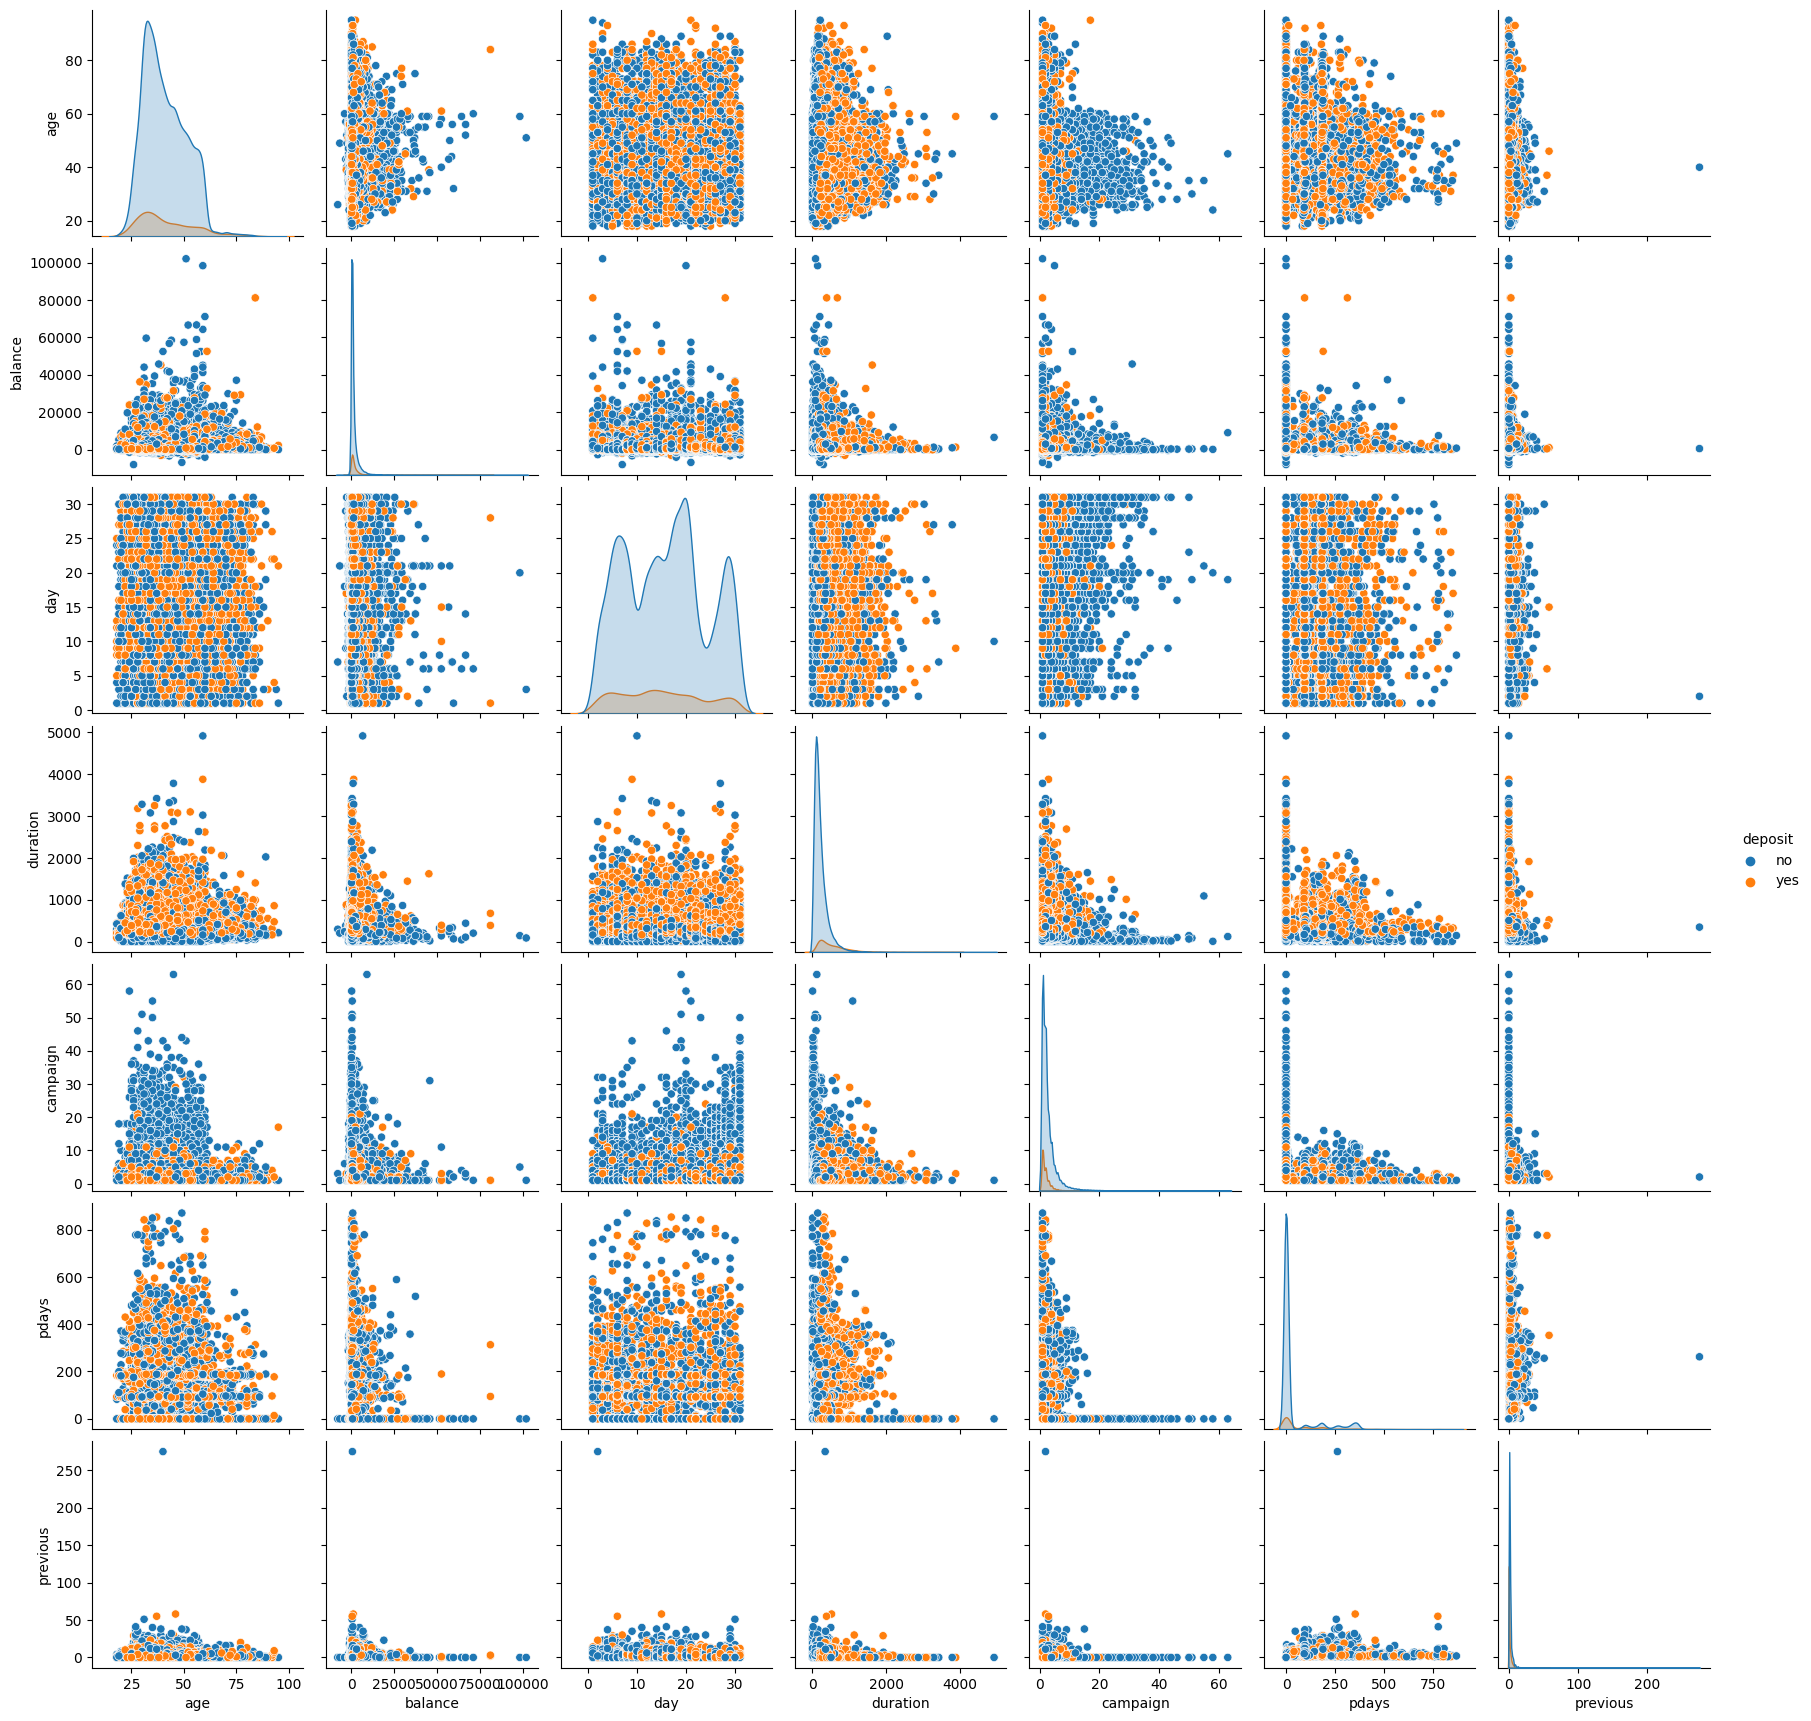

In [117]:
#Pair plot

sns.pairplot(data=df,hue='deposit')

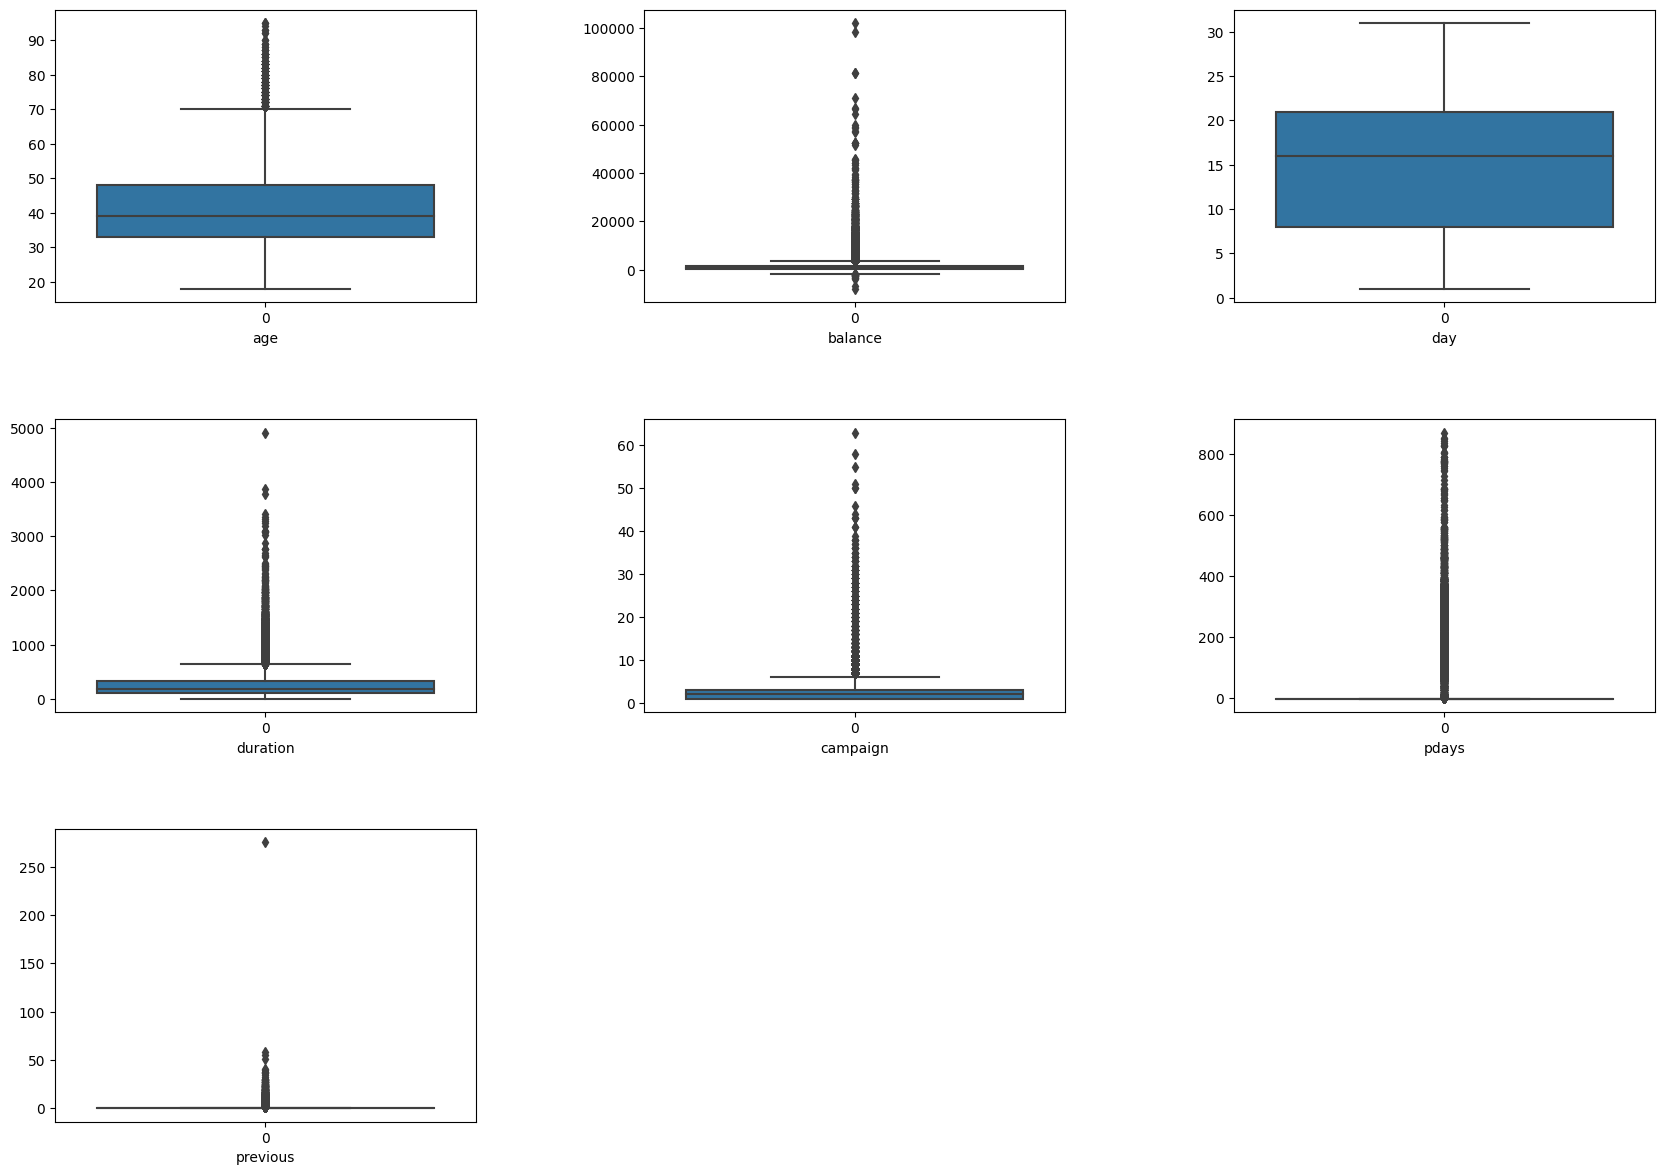

In [118]:
### Find out the outlier from numerical features by using boxplot()

plt.figure(figsize=(20,60))
pltnum = 1
for feature in numerical_features:
    ax = plt.subplot(12,3,pltnum)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    pltnum+=1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


#### Note:-
- age,balance,duration,campaign,pdays and previous has outlier

In [119]:
### Find the correlation between numerical features
df_corr = df.corr()
df_corr

C:\Users\Sairam\AppData\Local\Temp\ipykernel_15160\4284908730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot: >

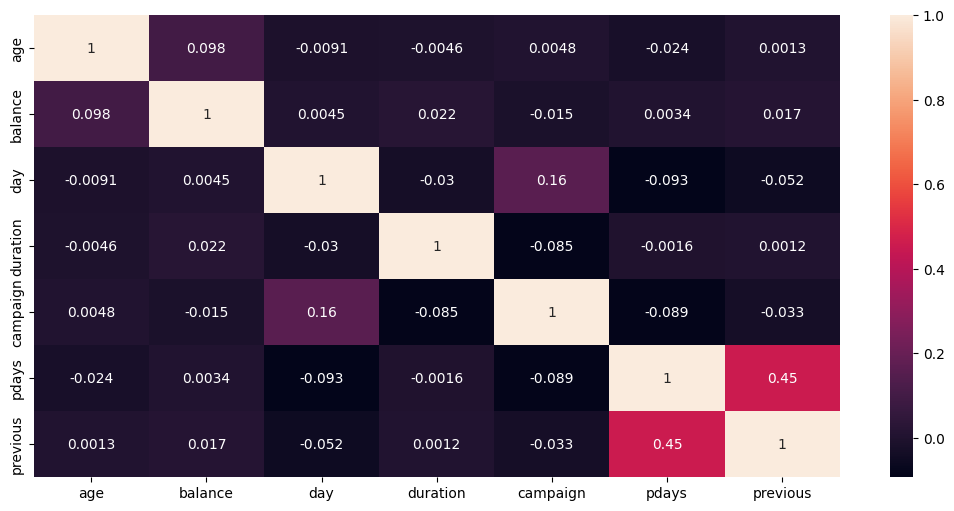

In [120]:
# create heatmap for correlation
fig = plt.figure(figsize=(13,6))
sns.heatmap(data=df_corr,annot=True)

#### Note:-
- There is no high correlation between any numerical features.

### check the given data set is balance or not based on dependent or target variable.

<AxesSubplot: xlabel='deposit', ylabel='count'>

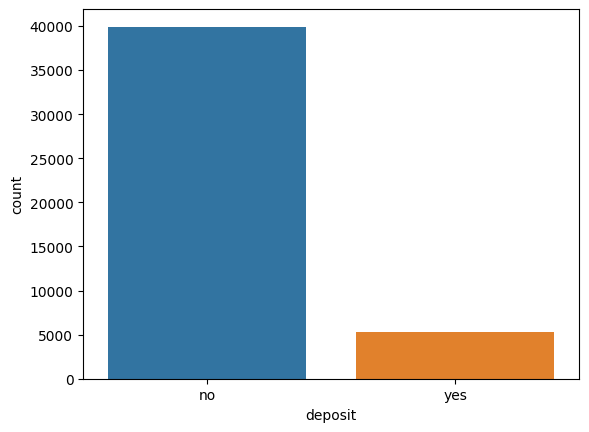

In [121]:
# draw a count plot of target variable
sns.countplot(x='deposit',data=df)

In [122]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

#### Note:-
- there are major difference in target value.
- the given data set is no balanced.

### Feature Engineering

In [123]:
### Copy data set into new data set
df2 = df.copy()

In [124]:
df2.shape

(45211, 17)

In [125]:
df2['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [126]:
df2['contact'].value_counts('unknown')*100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

In [127]:
df2['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [128]:
df2['poutcome'].value_counts('unknown')*100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

In [129]:
df2['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [130]:
df2['deposit'].value_counts('unknown')*100

no     88.30152
yes    11.69848
Name: deposit, dtype: float64

In [131]:
df2.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

#### Note:-
- More than 94% data has no value so we drop that columns

In [132]:
df2.drop(['default'],axis=1,inplace=True)
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [133]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

#### Note:-
- More than 74% data has '-1' value so we drop that columns

In [134]:
df2.drop(['pdays'],axis=1,inplace=True)
#df2.columns

In [135]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

#### Removing Outliers
- In EDA part,we see that age,balance,duration,campaign,pdays and previous has outlier,so remove that outlier

In [136]:
# Removing outlier from age feature
df2.groupby(['age'],sort=True)['age'].count()
## we see that age lies between 18 to 95 so we can ignore them

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [137]:
## Removing outliers from balance features
df2.groupby(['deposit','balance'],sort=True)['balance'].size()
## we can not remove that outlier because high balance customer show interest on deposit

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

In [138]:
## Removing outlier from duration feature
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
## we ignore that outlier beacuse low duration indicate that clients are not interested for deposit

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

In [139]:
##Removing outlier from campaign features

df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [140]:
df3 = df2[df2['campaign'].sort_values() > 33]
df3.head(40)

C:\Users\Sairam\AppData\Local\Temp\ipykernel_15160\3485553929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df2['campaign'].sort_values() > 33]


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
4275,40,blue-collar,married,secondary,-365,yes,no,unknown,19,may,44,43,0,unknown,no
4299,30,management,single,tertiary,358,yes,no,unknown,19,may,88,51,0,unknown,no
4330,45,management,married,unknown,9051,yes,no,unknown,19,may,124,63,0,unknown,no
4334,42,blue-collar,married,primary,170,yes,no,unknown,19,may,51,41,0,unknown,no
5073,35,technician,married,secondary,432,yes,no,unknown,21,may,1094,55,0,unknown,no
5459,35,blue-collar,married,secondary,430,yes,no,unknown,23,may,147,50,0,unknown,no
5721,48,management,single,tertiary,145,yes,no,unknown,26,may,14,38,0,unknown,no
9964,26,blue-collar,single,primary,535,yes,no,unknown,9,jun,21,37,0,unknown,no
10697,28,blue-collar,single,secondary,235,yes,no,unknown,16,jun,102,46,0,unknown,no
11301,28,blue-collar,single,secondary,623,no,no,unknown,18,jun,25,41,0,unknown,no


### Feature Scaling:-

In [141]:
#Backup
df_ready = df2.copy()

# importing sklearn libraries

from sklearn.preprocessing import StandardScaler

#initialization

sc = StandardScaler()

#Create list of numerical Features

num_cols = ['age','balance','day','campaign','previous']

#scaling

df_ready[num_cols] = sc.fit_transform(df_ready[num_cols])
df_ready.head()



,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,1.606965,management,married,tertiary,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.25194,unknown,no
1,0.288529,technician,single,secondary,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.25194,unknown,no


### Encoding
#### Dealing with categorical features

In [142]:
#List of categorical columns
cat_cols = ['job','marital','education','contact','month','poutcome']

# Encoding
#df_ready = pd.get_dummies(data = df_ready,columns=cat_cols)
df_ready = pd.get_dummies(data = df_ready,columns=cat_cols)

df_ready.shape


(45211, 47)

In [143]:
df_ready.head()

,age,balance,housing,loan,day,duration,campaign,previous,deposit,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,yes,no,-1.298476,261,-0.569351,-0.25194,no,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,yes,no,-1.298476,151,-0.569351,-0.25194,no,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,yes,yes,-1.298476,76,-0.569351,-0.25194,no,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,yes,no,-1.298476,92,-0.569351,-0.25194,no,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,no,no,-1.298476,198,-0.569351,-0.25194,no,0,...,0,0,1,0,0,0,0,0,0,1


In [144]:
boolean_category = ['housing','loan','deposit']
for col in boolean_category:
    df_ready[col+'_new']=df_ready[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_ready.drop(col, axis=1, inplace=True)

In [145]:
df_ready.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.25194,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.25194,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.25194,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.25194,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.25194,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
df_ready.tail()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.251940,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.251940,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.050473,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.251940,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
45210,-0.370689,0.528364,0.143418,361,-0.246560,4.523577,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [147]:
df_ready.head().T

,0,1,2,3,4
age,1.606965,0.288529,-0.747384,0.571051,-0.747384
balance,0.256419,-0.437895,-0.446762,0.047205,-0.447091
day,-1.298476,-1.298476,-1.298476,-1.298476,-1.298476
duration,261.000000,151.000000,76.000000,92.000000,198.000000
campaign,-0.569351,-0.569351,-0.569351,-0.569351,-0.569351
previous,-0.251940,-0.251940,-0.251940,-0.251940,-0.251940
job_admin.,0.000000,0.000000,0.000000,0.000000,0.000000
job_blue-collar,0.000000,0.000000,0.000000,1.000000,0.000000
job_entrepreneur,0.000000,0.000000,1.000000,0.000000,0.000000
job_housemaid,0.000000,0.000000,0.000000,0.000000,0.000000


In [148]:
df_ready.deposit_new.unique()

array([0, 1], dtype=int64)

In [149]:
#printing the shape of data
print(df_ready.shape)

(45211, 47)


In [150]:
#seperating input and output features

## Input or independent features
X = df_ready.drop('deposit_new',axis=1)

## Target or dependent feature
y = df_ready['deposit_new']

### Make dependent feature balance so we are use SMOTE(OVERSAMPLING)

In [151]:
# importing the necessary libraries and function
from imblearn.over_sampling import SMOTE

In [152]:
# Creating an instance or object of SMOTE
sm = SMOTE()
# apple to tarining set
X_train_smote, y_train_smote = sm.fit_resample(X,y)

In [153]:
X_train_smote.shape,y_train_smote.shape

((79844, 46), (79844,))

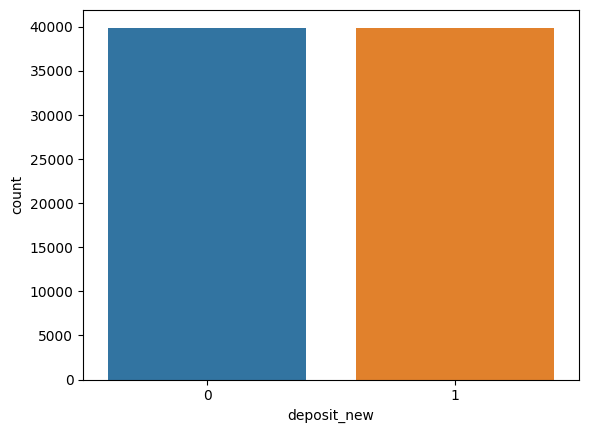

In [154]:
# Recheck imbalance of traget variable
sns.countplot(x=y_train_smote,data=df_ready)
plt.show()

#### Note:-
- So we observe that target variable is in balance form by using ovesampling.

### Split the data set into Training set and Test set

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_smote,y_train_smote,test_size=0.2,random_state=7)

#### Note:-
- The target variable is unbalanced so it creates a bias for the prediction.

### Logistic Regression

In [157]:
# Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(X_train_smote,y_train_smote)

E:\JupyterDemo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
# Prediction from the model
y_pred = log_reg.predict(X_test)

In [159]:
# Evalution
from sklearn.metrics import accuracy_score
print('Accuracy Score:-',accuracy_score(y_test,y_pred))

Accuracy Score:- 0.923414114847517


### Support Vector Machine

In [160]:
# Model
from sklearn.svm import SVC
svc = SVC(kernel= 'rbf')

## fitting the model
svc.fit(X_train_smote,y_train_smote)

SVC()

In [161]:
# Prediction from the model
y_pred = svc.predict(X_test)

In [162]:
# Evalution
from sklearn.metrics import accuracy_score
print('Accuracy Score:-',accuracy_score(y_test,y_pred))

Accuracy Score:- 0.7364894483060931


### Decision Tree Clasifier

In [163]:
# Model

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Fitting the model
dtc.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [164]:
# prediction from the model
y_pred = dtc.predict(X_test)

In [165]:
# Evalution 
from sklearn.metrics import accuracy_score
print('Accuracy Score:-',accuracy_score(y_test,y_pred))

Accuracy Score:- 1.0


## Conclusion:-
- The main objective of this project is to create a model that customers will subscribe to bank term deposits.
- we were able to achieve that by considering three different models and using the best one for prediction. 
- In the results obtained, we observe that logistic regression was the best model with higher percentage values.



